In [1]:
import pandas as pd
import cv2
import numpy as np

import matplotlib.pyplot as plt

deg_to_rad = np.pi/180

In [2]:
df = pd.read_csv("cell_metrics_VISp.csv")

In [3]:
id_cols = [
    "experiment_container_id", "cell_specimen_id"
]

sg_cols = [
    "pref_ori_sg", "pref_sf_sg", "pref_phase_sg"
]

dg_cols = [
    "pref_dir_dg", "pref_tf_dg"
]

In [4]:
df = df[df["failed_experiment_container"]=="f"]
len(df)

63251

### Sample Static Filters

In [5]:
df_sg = df[id_cols+sg_cols].dropna()

len(df_sg)

30997

In [6]:
df_sg

,experiment_container_id,cell_specimen_id,pref_ori_sg,pref_sf_sg,pref_phase_sg
6,511498742,517397361,150.0,0.08,0.50
8,511498742,517397369,30.0,0.08,0.00
10,511498742,517397377,30.0,0.08,0.00
11,511498742,517397381,120.0,0.32,0.25
12,511498742,517397385,90.0,0.02,0.25
...,...,...,...,...,...
63239,712178509,738948929,60.0,0.04,0.25
63240,712178509,738949054,30.0,0.16,0.25
63242,712178509,738949127,150.0,0.08,0.75
63245,712178509,738949207,60.0,0.04,0.75


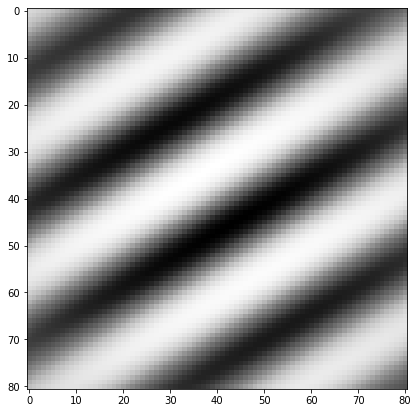

In [7]:
ori = 60
sf = 0.04
phase = 0.25

g = cv2.getGaborKernel(
    ksize=(80,80),
    sigma=50,
    theta=ori*deg_to_rad,
    lambd=1/sf,
    gamma=1,
    psi=phase*2*np.pi, 
)

plt.figure(figsize=(10, 7))
plt.imshow(g, cmap='Greys')
plt.show()

### Sample Dynamic Filters

In [8]:
df_dg = df[id_cols+dg_cols].dropna()

len(df_dg)

29635

In [9]:
frames_per_s = 60

In [10]:
spat_freq = 0.08
temp_freq = 4
orientation = 0 # true values are 0, 45, 90, 135, 180, 225, 270, 315

In [11]:
gs = [
    cv2.getGaborKernel(
        ksize=(80,80),
        sigma=40,
        theta=orientation*deg_to_rad,
        lambd=1/spat_freq,
        gamma=1,
        psi=i*2*np.pi,
    )
    for i in np.linspace(0, 1, int(frames_per_s/temp_freq))
]